# Python-1, Лекция 4

Лектор: Хайбулин Даниэль

Подготовил материал: Хайбулин Даниэль

Сегодня мы поговорим про ссылки, изменяемость объектов и начнем говорить про функции.

## Переменные - это не коробки!

У нас есть две переменные **a** и **b**. Мы присваиваем двум этим переменным список чисел:

In [ ]:
a = [1, 2, 3]
b = [1, 2, 3]

assert a == b

In [ ]:
a = [1, 2, 3]
b = a
b.append(4)
assert a == [1, 2, 3, 4]

Почему так происходит? Потому что мы не создали вторую коробку **b**, в которой хранится новый такой же список, а просто приклеили стикер **b** к уже созданному в памяти списку. Тут уже нужно быть аккуратными.

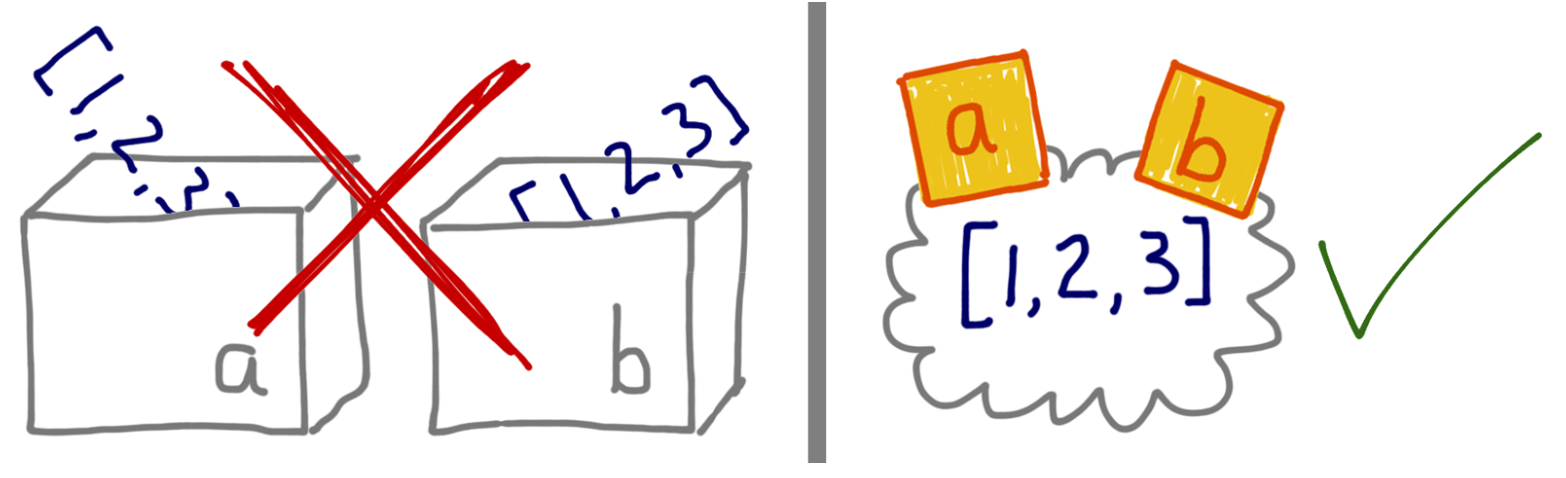

## Идентичность и равенство.

Раньше нам уже встречались **is** и **==** (на самом деле это dunder метод __eq__).

- is сравнивает id объектов.
- == сравнивает объекты реализованным у них методом сравнения.

Давайте рассмотрим пример как отыскать импостера:

In [ ]:
cookie = {"name": "Cookie", "color": "Grey", "size": "small"}
brownie = cookie
assert cookie is brownie

In [ ]:
id(cookie), id(brownie)

Как видим id cookie и brownie одинаковые. Это все о тех же стикерах на объект. Объект в итоге создался один. Конечно cookie также равен brownie:

In [ ]:
assert cookie == brownie

In [ ]:
cookie["age"] = 3
assert brownie["age"] == 3

In [ ]:
brownie

Опять же, по 'стикеру' cookie мы добавили словарю возраст: сам объект изменился. 'Стикер' brownie **указывает** на тот же самый объект, поэтому и в нем появился новый ключ.

Теперь добавим импостера:

In [ ]:
imposter = {"name": "Cookie", "color": "Grey", "size": "small", "age": 3}
assert cookie == imposter

In [ ]:
assert imposter is not cookie

In [ ]:
id(cookie), id(imposter)

<div style="
    background-color: #44944A;
    padding: 15px;
    border-radius: 10px;
    border: 1px solid #fbfbfbff;
    text-align: center;
    display: flex;
    justify-content: center;
    align-items: center;
    min-height: 15px;
">
    <span style="color: white; font-weight: bold;">
        Равные объекты, но сами объекты в памяти уже разные, так как айди у них отличаются!
    </span>
</div>

## Когда ==, а когда is?

На самом деле чаще всего мы используем сравнение, а не идентичность. 

Однако есть случаи когда правильно использовать **is**:

In [ ]:
a = 1
b = None
assert b is None
assert a is not None

<div style="
    background-color: #44944A;
    padding: 15px;
    border-radius: 10px;
    border: 1px solid #fbfbfbff;
    text-align: center;
    display: flex;
    justify-content: center;
    align-items: center;
    min-height: 15px;
">
    <span style="color: white; font-weight: bold;">
        is быстрее чем == так как его нельзя переопределить
    </span>
</div>

Однако не стоит обманываться скоростью и не нужно никогда проверять на равенствно объекты через is.

In [ ]:
a = 5
b = 5

assert a is b

id(a), id(b)

<div style="
    background-color: #8B0000;
    padding: 15px;
    border: 2px dashed #ba0606;
    border-radius: 5px;
    text-align: center;
    display: flex;
    justify-content: center;
    align-items: center;
    min-height: 20px;
">
<span style="color: white; font-weight: bold;">
        Антипаттерн: сравнение объектов при помощи is!
    </span>
</div>

Конечно, такое сравнение может сработать на маленьких числах, которые изначально загружаются в память при запуске программы, однако, если немного увеличим числа, то все уже поломается:

In [ ]:
a = 1 << 10
b = 1 << 10
assert a is b, "Числа не равны"

In [ ]:
assert a == b
id(a), id(b)

Видим что в данном примере id уже разные.

## Относительная неизменяемость.

Теперь поговорим об изменяемых и неизменяемых типах.

Бытует мнение, что кортеж - неизменяемый тип данных. Это так, но есть одно но:

In [ ]:
t1 = (1, 2, [3, 4])
t2 = (1, 2, [3, 4])

In [ ]:
assert t1 == t2

In [ ]:
id(t1[-1])

Можем ли мы все-таки изменить кортеж?

In [ ]:
t1[-1].append(5)

<div style="
    background-color: #FFBA00;
    padding: 15px;
    border-left: 5px solid #ffcc00;
    text-align: center;
    display: flex;
    justify-content: center;
    align-items: center;
    min-height: 15px;
">
    <span style="color: white; font-weight: bold;">
        Кортеж можно изменить.
    </span>
</div>

In [ ]:
t1

In [ ]:
t1 == t2

Что произойдет с кортежем в данном случае?

In [ ]:
t = (1, 2, [3, 4])
t[-1] += [5, 6]

In [ ]:
t

<div style="
    background-color: #8B0000;
    padding: 15px;
    border: 2px dashed #ba0606;
    border-radius: 5px;
    text-align: center;
    display: flex;
    justify-content: center;
    align-items: center;
    min-height: 20px;
">
<span style="color: white; font-weight: bold;">
        Операция += неатомарна. Код может упасть, но исходный объект изменится.
    </span>
</div>

## Копии объектов.

In [ ]:
l1 = [1, [2, 3], (4, 5, 6)]
l2 = list(l1)

assert l2 == l1
assert l2 is not l1
assert l2[1] is l1[1]

Что здесь произошло?

Мы создаем новый список на основе первого, но уже делаем его копию, то есть создаем второй объект. Если изменим первый список, то второй не изменится.

In [ ]:
l1.append(3)
l2

In [ ]:
l1[1].append(4)
l2

А тут уже что-то пошло не так...

<div style="
    background-color: #44944A;
    padding: 15px;
    border-radius: 10px;
    border: 1px solid #fbfbfbff;
    text-align: center;
    display: flex;
    justify-content: center;
    align-items: center;
    min-height: 15px;
">
    <span style="color: white; font-weight: bold;">
        shallow copy - дублируется внешний контейнер, однако копия наполнена ссылками на те же объекты, что и в оригинальном контейнере.
    </span>
</div>

In [ ]:
assert l1[1] is l2[1]

Как видим это правда, вложенные объекты идентичны и равны, а значит у нас не создался никакой второй вложенный список и вложенный кортеж.

<div style="
    background-color: #FFBA00;
    padding: 15px;
    border-left: 5px solid #ffcc00;
    text-align: center;
    display: flex;
    justify-content: center;
    align-items: center;
    min-height: 15px;
">
    <span style="color: white; font-weight: bold;">
        Такое копирование рекомендуется только с неизменяемыми объектами внутри для экономии памяти.
    </span>
</div>

In [ ]:
l1 = [3, [66, 55, 44], (7, 8, 9)]
l2 = list(l1)
l1.append(100)
l1[1].remove(55)
print("l1:", l1)
print("l2:", l2)
l2[1] += [33, 22]
l2[2] += (10, 11)
print("l1:", l1)
print("l2:", l2)

Можем наглядно посмотреть что произойдет в результате всех операцией выше. Также можем посмотреть пошагово при помощи сайта https://pythontutor.com/.

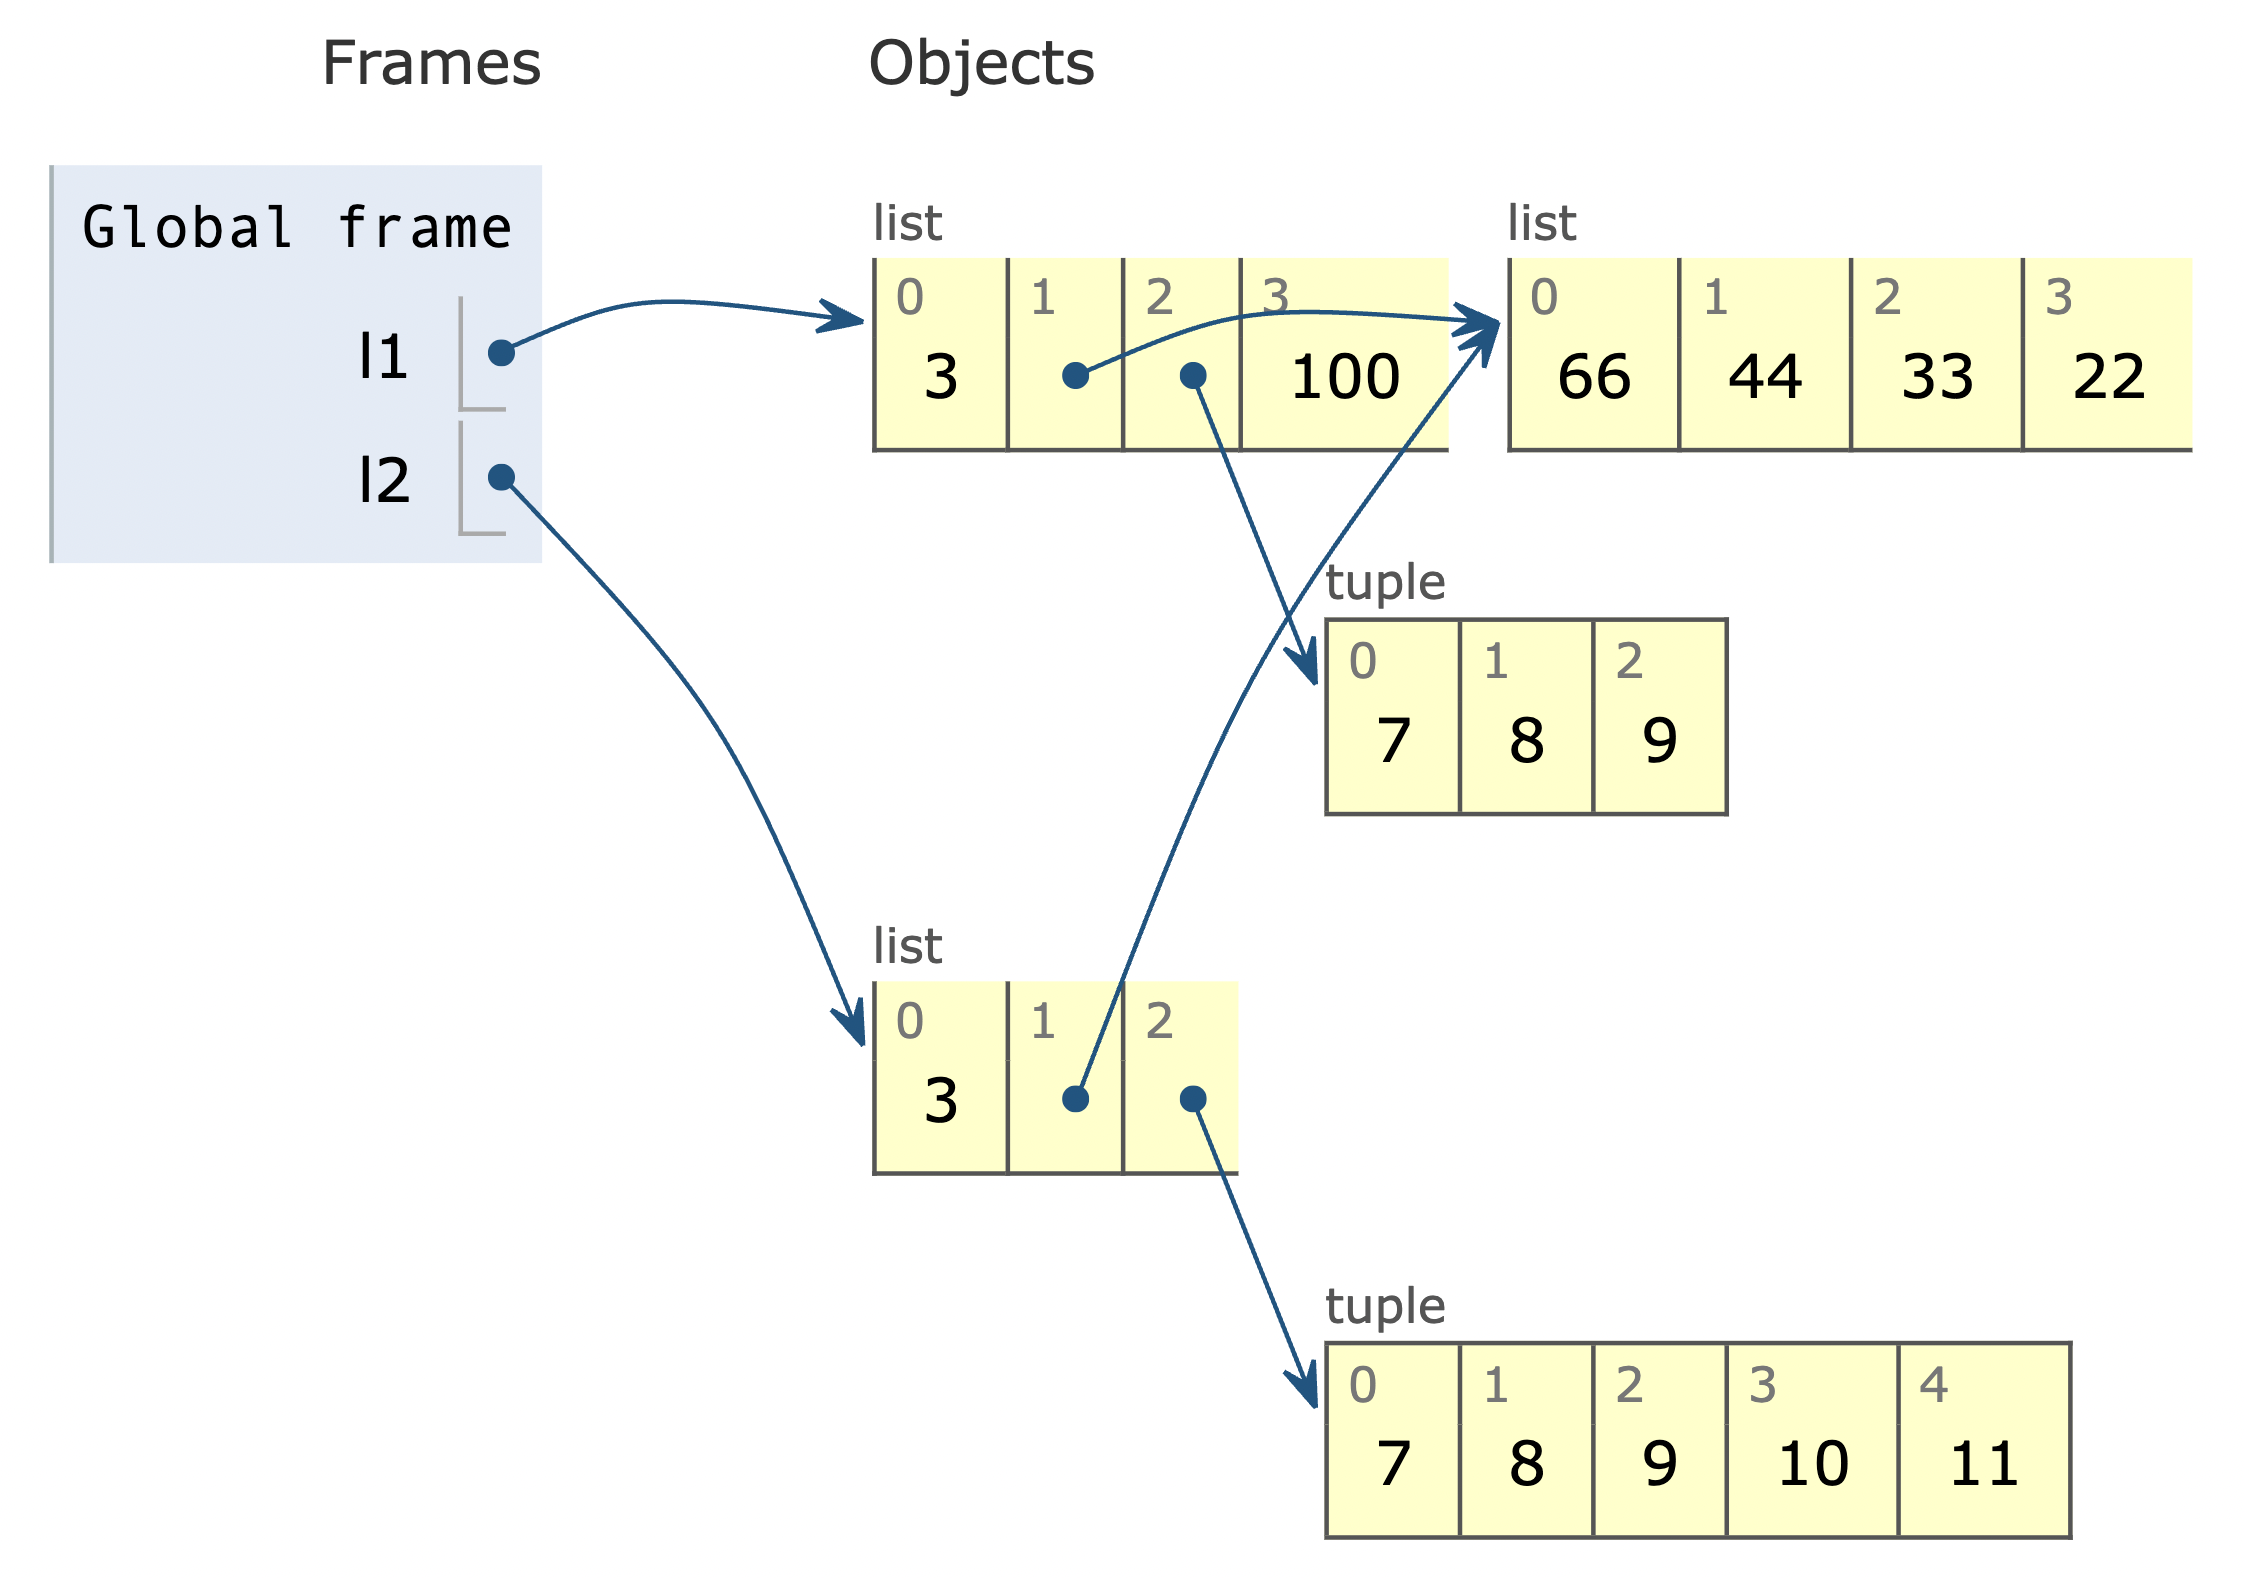

## Глубокое копирование.

In [ ]:
from copy import deepcopy

l1 = [1, [2, 3], (4, 5, 6)]
l2 = deepcopy(l1)

assert l2 == l1
assert l2 is not l1
assert l2[1] is not l1[1]

l1[1].append(4)

assert l1[1] == [2, 3, 4], l2[1] == [2, 3]

<div style="
    background-color: #44944A;
    padding: 15px;
    border-radius: 10px;
    border: 1px solid #fbfbfbff;
    text-align: center;
    display: flex;
    justify-content: center;
    align-items: center;
    min-height: 15px;
">
    <span style="color: white; font-weight: bold;">
        deep copy - полное копирование объектов, включая все вложенные в них объекты.
    </span>
</div>

Итак, когда что используем?

Shallow copy:

- когда работаем с простыми объектами без вложенности;
- когда нам важно экономить память и нестрашно если один объект расползется в несколько мест.

Deepcopy:

- когда работаем с вложенными данными;

Ниже посмотрим на цикличные ссылки:

In [ ]:
a = [10, 20]
b = [a, 30]
a.append(b)
a, a[2], a[2][0][2], a[2][0][2][0][2]

In [ ]:
a = []
a.append(a)
assert a is a[0], a[0] is a[0][0]
assert a == a[0], a[0] == a[0][0]
a

## Занимаемая память.

Ниже варианты как можно посмотреть сколько памяти занимает объект:

In [ ]:
[].__sizeof__()

In [ ]:
assert [1, 2, []].__sizeof__() == [1, 2, [1, 2, 1]].__sizeof__()
assert [1, 2, ()].__sizeof__() == [1, 2, (1)].__sizeof__()

40 байт на список, а также по 8 байт на каждый объект внутри:

In [ ]:
assert [1, 2, []].__sizeof__() == 40 + 8 + 8 + 8

In [ ]:
().__sizeof__(), [].__sizeof__()

In [ ]:
assert (1, 2, [3]).__sizeof__() == (1, 2, 3).__sizeof__()

## Функции. Начало.

Пора нам познакомиться с функциями. Какие-то из них вам уже знакомы, например:

In [ ]:
type(print), type(input), type(type)

<div style="
    background-color: #44944A;
    padding: 15px;
    border-radius: 10px;
    border: 1px solid #fbfbfbff;
    text-align: center;
    display: flex;
    justify-content: center;
    align-items: center;
    min-height: 15px;
">
    <span style="color: white; font-weight: bold;">
        Функция - логический кусок кода, который делает в точности то как он называется.
    </span>
</div>

Зачем нам нужны функции?

- упрощение кода;
- логическое структурирование кода;
- переиспользование функций;

Для начала давайте посмотрим на "чистые" функции и что их определяет:

- предсказуемость;
- отсутствие побочных эффектов;
- независимость от внешнего состояния;

Дальше на примерах посмотрим что это значит.

Ну, начнем!

<div style="
    background-color: #44944A;
    padding: 15px;
    border-radius: 10px;
    border: 1px solid #fbfbfbff;
    text-align: center;
    display: flex;
    justify-content: center;
    align-items: center;
    min-height: 15px;
">
    <span style="color: white; font-weight: bold;">
        Функция - это объект.
    </span>
</div>

Поэтому с функцией можно делать следующее:

- присвоить переменной или полю в классе;
- передать в качестве аргумента функции;
- использовать в качестве возвращаемого значения функции;

In [ ]:
def factorial(n: int) -> int:
    """returns n!"""
    return 1 if n < 2 else n * factorial(n - 1)

Наконец-то мы объявили первую функцию, а именно, реализацию факториала.

In [ ]:
factorial(3)

In [ ]:
factorial.__doc__

Теперь можем выводить документацию любой функции и читать подробно что она делает:

In [ ]:
print(print.__doc__)

In [ ]:
type(factorial), factorial.__annotations__

Интересный момент: так как функция - это объект, то и ключом в словаре она тоже может быть:

In [ ]:
d = {factorial: "factorial function"}
d

Можем присвоить функцию в другую переменную:

In [ ]:
f = factorial
f(4)

Можем даже сравнивать функции:

In [ ]:
assert f is factorial, f == factorial

И так тоже можем сделать:

In [ ]:
d[factorial] = f
d[f](3)

Заметим, что мы тут по ключу **f** обратились, который и есть ссылка на объект функции, а **f** и **factorial** равны и идентичны.

<div style="
    background-color: #44944A;
    padding: 15px;
    border-radius: 10px;
    border: 1px solid #fbfbfbff;
    text-align: center;
    display: flex;
    justify-content: center;
    align-items: center;
    min-height: 15px;
">
    <span style="color: white; font-weight: bold;">
        В питоне функция всегда возвращает значение. Если в теле функции отсутствует "return", она возвращает "None"
    </span>
</div>

<div style="
    background-color: #44944A;
    padding: 15px;
    border-radius: 10px;
    border: 1px solid #fbfbfbff;
    text-align: center;
    display: flex;
    justify-content: center;
    align-items: center;
    min-height: 15px;
">
    <span style="color: white; font-weight: bold;">
        В питоне функция может содержать более одного "return"
    </span>
</div>

In [ ]:
def placeholder() -> None: ...

In [ ]:
assert placeholder() is None

In [ ]:
def is_even_dirty(n: int) -> bool:
    if n % 2 == 0:
        return True
    else:
        return False


is_even_dirty(1), is_even_dirty(2)

<div style="
    background-color: #8B0000;
    padding: 15px;
    border: 2px dashed #ba0606;
    border-radius: 5px;
    text-align: center;
    display: flex;
    justify-content: center;
    align-items: center;
    min-height: 20px;
">
<span style="color: white; font-weight: bold;">
        Выше указан грязный код, так как много лишнего, ниже варианты улучшения:
    </span>
</div>

In [ ]:
def is_even(n: int) -> bool:
    return n % 2 == 0


is_even(1), is_even(2)

Немного функционального программирования:

In [ ]:
list(
    map(
        factorial,
        range(11),
    ),
)

Что вообще делает этот код?

**map** - применяет переданную первым аргументом функцию к каждому объекту в итерируемом втором аргументе. Про итерируемый мы еще много поговорим.

**list** - строит список на основе результата 11 применений функции factorial к объектам из **range(11)**

Выше мы рассмотрели примеры функций первого порядка, но есть еще функции высшего порядка, например, тот же **map**.

<div style="
    background-color: #44944A;
    padding: 15px;
    border-radius: 10px;
    border: 1px solid #fbfbfbff;
    text-align: center;
    display: flex;
    justify-content: center;
    align-items: center;
    min-height: 15px;
">
    <span style="color: white; font-weight: bold;">
        Функция высшего порядка принимает в качестве аргумента функцию или возвращает функцию.
    </span>
</div>

Рассмотрим встроенную функцию сортировки: **sorted**. 

Это функция высшего порядка, потому что в качестве ключа сортировки также принимает функцию, например:

In [ ]:
fruits = ["strawberry", "fig", "apple", "cherry", "raspberry", "banana"]
sorted(fruits, key=len)

Можем посортировать этот список порядке обратного произношения:

In [ ]:
def reverse(word: str) -> str:
    return word[::-1]


reverse("abc")

In [ ]:
sorted(fruits, key=reverse)

Поговорим еще немного про функциональное программирование. В питоне есть встроенные map и filter, однако в современном питоне есть механизмы посильнее и удобнее: list comprehensions и генераторные выражения (их мы рассмотрим позже).

Давайте сравним разные подходы:

In [ ]:
list(map(factorial, range(6)))

In [ ]:
[factorial(_) for _ in range(6)]

In [ ]:
list(map(factorial, filter(lambda n: n % 2, range(6))))

In [ ]:
[factorial(n) for n in range(6) if n % 2]

Мне намного понятнее читать списковые вложения, нежели функциональное программирование. Рекомендуется использовать именно их, не только потому что мне удобнее, а потому что в основном люди так и пишут код, так как читаемость имеет значение.

## Анонимные функции или лямбда функции

In [ ]:
fruits = ["strawberry", "fig", "apple", "cherry", "raspberry", "banana"]
sorted(fruits, key=lambda word: word[::-1])

Гайд как работать с лямбда функциями:

1. Напишите комментарий, объясняющий что вообще делает эта лямбда функция.
2. Немножко подумайте об этом комментарии, придумайте название для него.
3. Измените лямбду на нормальную функцию с использованием **def** и придуманного названия.
4. Удалите комментарий и лямбда функцию.